<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Makine_%C3%96%C4%9Frenimi_ile_Hata_Tahmini_ve_%C3%96nleme(demo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

•	Makine Öğrenimi ile Hata Tahmini ve Önleme

In [ ]:
# Gerekli kütüphaneleri yüklüyoruz
!pip install pandas scikit-learn matplotlib numpy seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

2. Örnek Veri Seti Oluşturma


In [ ]:
# Rastgele veri oluşturma
np.random.seed(42)

# 1000 örnek ve 5 özellik ile veri seti oluşturuyoruz
data_size = 1000
features = {
    'Sıcaklık': np.random.normal(50, 15, data_size),
    'Basınç': np.random.normal(100, 20, data_size),
    'Titreşim': np.random.normal(5, 2, data_size),
    'Akım': np.random.normal(10, 3, data_size),
    'Gerilim': np.random.normal(220, 30, data_size)
}

df = pd.DataFrame(features)

# Hata durumunu simüle ediyoruz (hedef değişken)
df['Hata'] = np.where(
    (df['Sıcaklık'] > 70) |
    (df['Basınç'] < 60) |
    (df['Titreşim'] > 8) |
    (df['Akım'] > 15) |
    (df['Gerilim'] < 180),
    1,  # Hata var
    0   # Hata yok
)

# Veri setini göster
df.head()

,Sıcaklık,Basınç,Titreşim,Akım,Gerilim,Hata
0,57.450712,127.987109,3.649643,4.276577,194.095192,0
1,47.926035,118.492674,4.710963,7.418845,219.063895,0
2,59.715328,101.192607,3.415160,8.759183,220.540506,0
3,72.845448,87.061264,4.384077,15.663063,234.178910,1
4,46.487699,113.964466,1.212771,11.669659,178.994249,1


3. Veri Analizi ve Görselleştirme


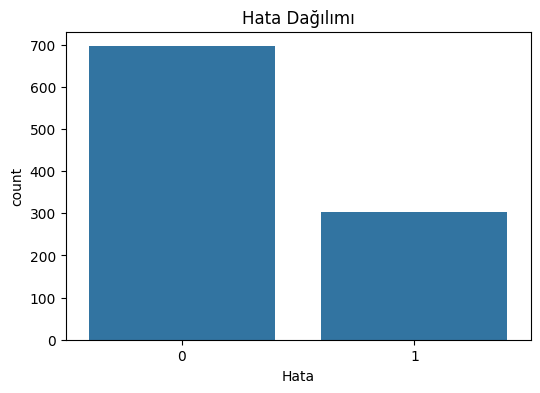

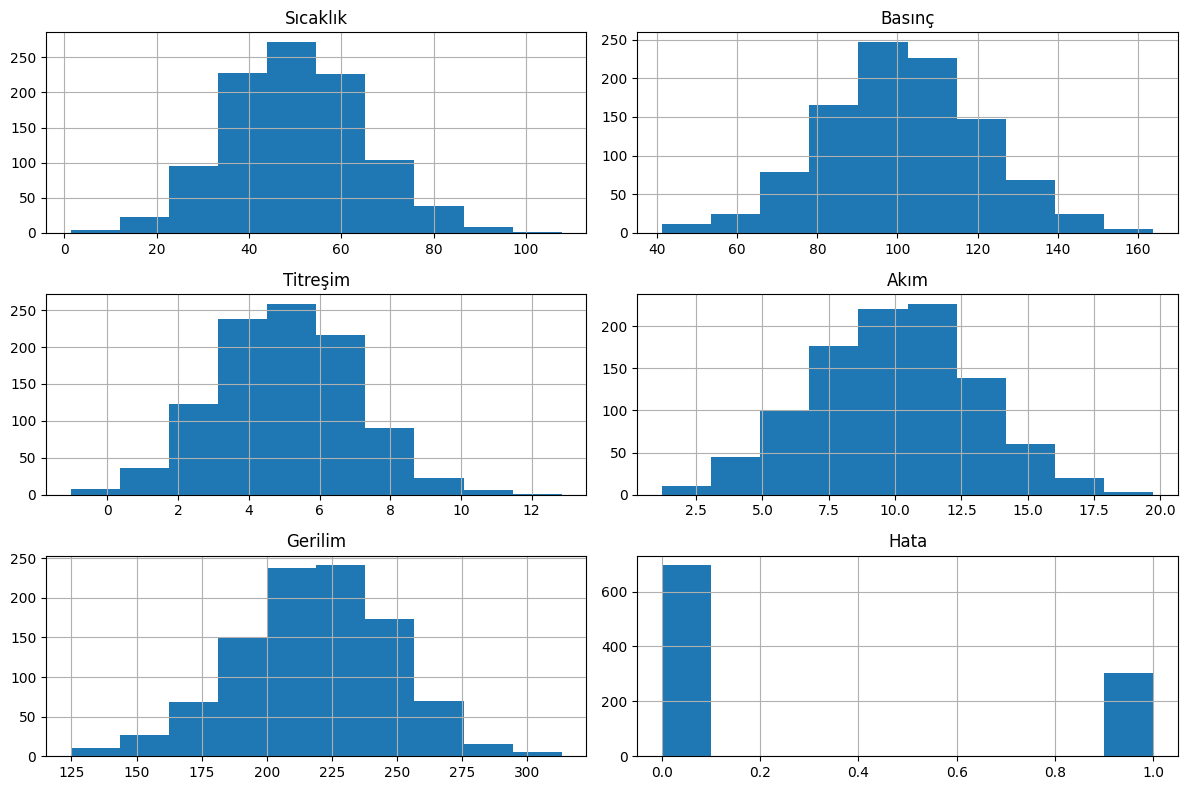

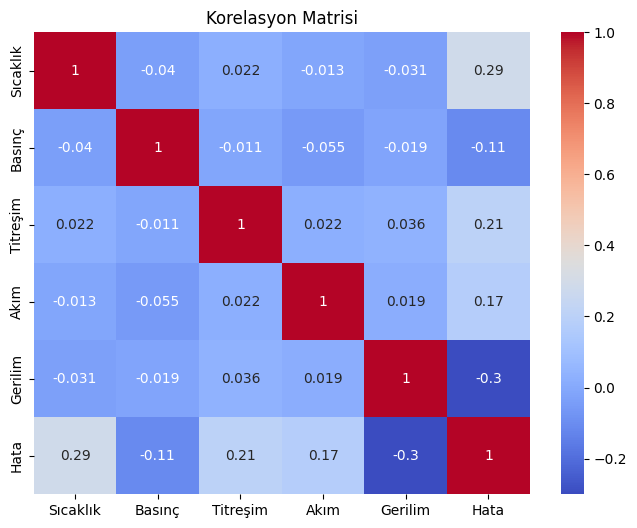

In [ ]:
# Hata dağılımı
plt.figure(figsize=(6,4))
sns.countplot(x='Hata', data=df)
plt.title('Hata Dağılımı')
plt.show()

# Özelliklerin dağılımı
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Korelasyon matrisi
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

4. Veri Ön İşleme


In [ ]:
# Özellikler ve hedef değişkeni ayırma
X = df.drop('Hata', axis=1)
y = df['Hata']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


5. Makine Öğrenimi Modeli Oluşturma ve Eğitme


In [ ]:
# Random Forest modelini oluşturma ve eğitme
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

6. Model Değerlendirme


Doğruluk Skoru: 0.99

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       211
           1       0.98      0.99      0.98        89

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



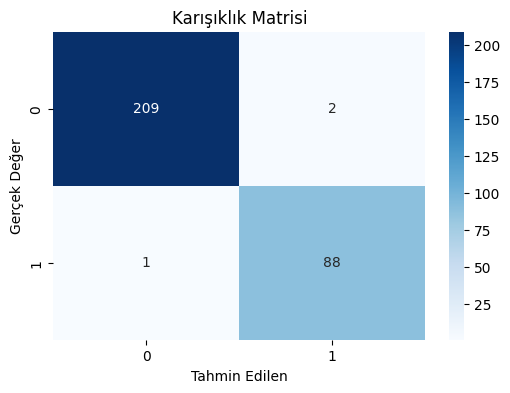

In [ ]:
# Performans metrikleri
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# Karışıklık matrisi
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

7. Hata Önleme için Önemli Özelliklerin Belirlenmesi


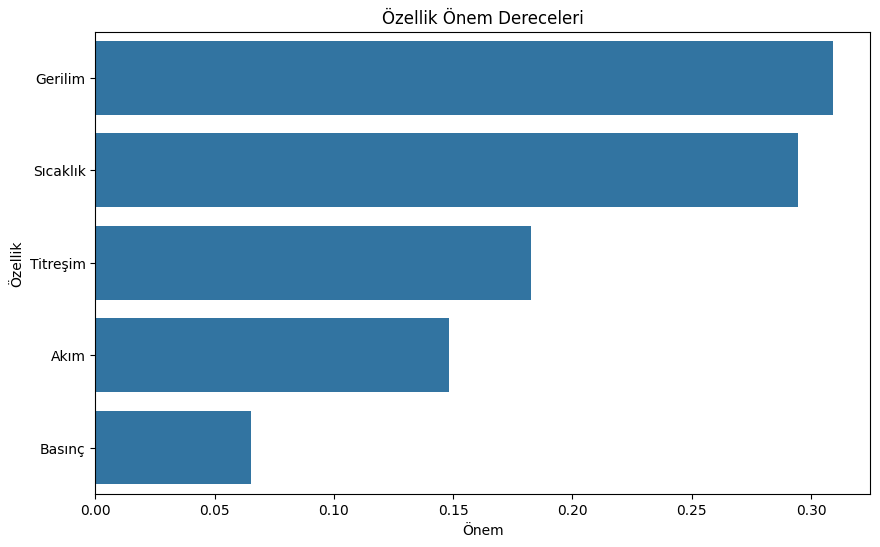

In [ ]:
# Özellik önem dereceleri
feature_importance = pd.DataFrame({
    'Özellik': X.columns,
    'Önem': model.feature_importances_
}).sort_values('Önem', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Önem', y='Özellik', data=feature_importance)
plt.title('Özellik Önem Dereceleri')
plt.show()